## About iPython Notebooks ##

iPython Notebooks are interactive coding environments embedded in a webpage. You will be using iPython notebooks in this class. Make sure you fill in any place that says `# BEGIN SOLUTION #END CODE HERE` searching for the missing parts (usually denoted with `...`). After writing your code, you can run the cell by either pressing "SHIFT"+"ENTER" or by clicking on "Run" (denoted by a play symbol). Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). 

 **What you need to remember:**

- Run your cells using SHIFT+ENTER (or "Run cell")
- Write code in the designated areas using Python 3 only
- Do not modify the code outside of the designated areas
- In some cases you will also need to explain the results. There will also be designated areas for that. 

Fill in your **NAME** and **AEM** below:

In [1]:
NAME = "Nikolaos Vogiatzis"
AEM = "3952"

---

# Assignment 2 - Decision Trees #

Welcome to your second assignment. This exercise gives you an introduction to [scikit-learn](https://scikit-learn.org/stable/). A simple but efficient machine learning library in Python. It also gives you a wide understanding on how decision trees work. 

After this assignment you will:
- Be able to use the scikit-learn library and train your own model from scratch.
- Be able to train and understand decision trees.

In [2]:
# Always run this cell
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# USE THIS RANDOM VARIABLE TO PRODUCE THE SAME RESULTS
RANDOM_VARIABLE = 42

## 1. Scikit-Learn and Decision Trees ##

You are going to use the scikit-learn library to train a model for detecting breast cancer using the [Breast cancer wisconsin (diagnostic) dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer) by training a model using [decision trees](https://scikit-learn.org/stable/modules/tree.html).

**1.1** Load the breast cancer dataset using the scikit learn library. From variable *cdata*, you should export the *X* and *y*, from the *data* and *target* variables of the variable *cdata*, respectively, and the feature names and target names from the variables *feature_names* and *target_names*, respectively. Convert the latter two (feature names and target names) into lists. Thus, X and y should be numpy arrays, and feature_names and target_names should be lists. Then split the dataset into train and test set using the appropriate function. Use 33% of the dataset as the test set. Define as X the attributes and as y the target values. Do not forget to set the random_state parameter as the *RANDOM_VARIABLE* defined above. Use this variable for all the random_state parameters in this assignment.

In [3]:
cdata = load_breast_cancer(as_frame=True)

# BEGIN SOLUTION
X = cdata.data.values
y = cdata.target.values
feature_names = cdata.feature_names.tolist()
target_names = cdata.target_names.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=RANDOM_VARIABLE)
# END CODE HERE

In [4]:
print("Type of X: {}".format(type(X)))
print("Type of y: {}".format(type(y)))
print("Type of feature_names: {}".format(type(feature_names)))
print("Type of target_names: {}".format(type(target_names)))
print("Size of train set: {}".format(len(y_train)))
print("Size of test set: {}".format(len(y_test)))
print("Unique classes: {}".format(len(set(y_test))))

Type of X: <class 'numpy.ndarray'>
Type of y: <class 'numpy.ndarray'>
Type of feature_names: <class 'list'>
Type of target_names: <class 'list'>
Size of train set: 381
Size of test set: 188
Unique classes: 2


**Expected output**:  

```
Type of X: <class 'numpy.ndarray'>
Type of y: <class 'numpy.ndarray'>
Type of feature_names: <class 'list'>
Type of target_names: <class 'list'>
Size of train set: 381
Size of test set: 188
Unique classes: 2
```



**1.2** Train two DecisionTree classifiers and report the F1 score. Use the information gain for the one classifier and the Gini impurity for the other, set the *max_depth* to 3, and do not forget to use the *RANDOM_VARIABLE*, as it is crucial for the following part.

In [5]:
# BEGIN SOLUTION
classifier_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=RANDOM_VARIABLE)
classifier_igain = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=RANDOM_VARIABLE)

classifier_gini.fit(X_train, y_train)
classifier_igain.fit(X_train, y_train)

prediction_gini = classifier_gini.predict(X_test)
prediction_igain = classifier_igain.predict(X_test)

f_measure_gini = f1_score(y_test, prediction_gini)
f_measure_igain = f1_score(y_test, prediction_igain)
# END CODE HERE

In [6]:
print("F-Measure Gini: {}".format(f_measure_gini))
print("F-Measure Information Gain: {}".format(f_measure_igain))

F-Measure Gini: 0.9663865546218487
F-Measure Information Gain: 0.979591836734694


**Expected output**:

```
F-Measure Gini: 0.9663865546218487
F-Measure Information Gain: 0.979591836734694
```

**1.3** In this part, you are going to explore one of the trained decision trees visually. We will use the *classifier_igain* and the function *export_graphviz* to plot the decision tree. You should fill in the missing parts of the functions parameters, which correspond to the decision tree model, the feature names and the target names.


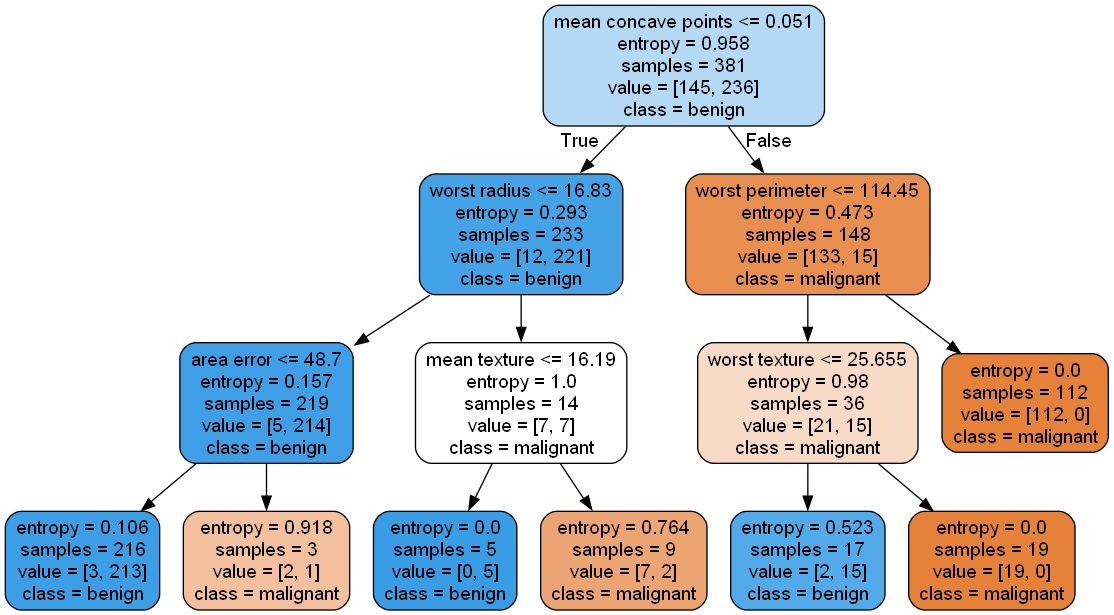

In [7]:
# Let's see how our tree looks
from sklearn.tree import export_graphviz
from IPython.display import Image
from subprocess import call

# BEGIN SOLUTION
export_graphviz(
        classifier_igain,
        feature_names=feature_names,
        class_names=target_names,
        out_file="dtree.dot",
        rounded=True,
        filled=True
    )
# END CODE HERE

call(['dot', '-Tpng', 'dtree.dot', '-o', 'dtree.png', '-Gdpi=96'])
Image(filename = 'dtree.png')

**1.4** Now, we will examine two random instances (7th and 136th). Thus, we are presenting the decision tree's predictions for these instances, and the ground truth values. Moreover, for each instance, we print the feature values. However, as we can see from the plot above, only 6 features out of the 30 are being used by the tree. Thus, in order to print less information, we will use the *feature_importances_* variable of our tree to check which features has 0 importance to skip them.

In [8]:
instance_a = 7
instance_b = 136
for instance in [instance_a, instance_b]:
  print(str(instance)+ 'th instance a was classified as: ' +target_names[prediction_igain[instance]] +' while the ground truth was: ' + target_names[y_test[instance]])
  # BEGIN SOLUTION
  for idf, feature_name in enumerate(feature_names):
    if classifier_igain.feature_importances_[idf] != 0:
      print('\t'+feature_name+": "+str(X_test[instance][idf]))
  # END CODE HERE
  print('\n')

7th instance a was classified as: malignant while the ground truth was: malignant
	mean texture: 15.05
	mean concave points: 0.07953
	area error: 61.1
	worst radius: 20.01
	worst texture: 19.52
	worst perimeter: 134.9


136th instance a was classified as: malignant while the ground truth was: benign
	mean texture: 18.89
	mean concave points: 0.05381
	area error: 19.29
	worst radius: 14.8
	worst texture: 27.2
	worst perimeter: 97.33




**Expected output**:

```
7th instance a was classified as: malignant while the ground truth was: malignant
	mean texture: 15.05
	mean concave points: 0.07953
	area error: 61.1
	worst radius: 20.01
	worst texture: 19.52
	worst perimeter: 134.9


136th instance a was classified as: malignant while the ground truth was: benign
	mean texture: 18.89
	mean concave points: 0.05381
	area error: 19.29
	worst radius: 14.8
	worst texture: 27.2
	worst perimeter: 97.33
```



**1.6** Based on the aforementioned information, and the plotted decision tree, identify one feature value that if changed in each instance, the predicted class will change as well. Specifically, you should find a feature value change that will be small. Answer in the following cell, either with code, or/and writing a small paragraph explaining the feature, the change and why the decision will change.

In [ ]:
# BEGIN SOLUTION



# END CODE HERE

or/and

YOUR ANSWER HERE


**1.7** Train multiple classifiers by modifying the max_depth within the range from 1 to 8 and save the f1 scores to the corresponding list of the *fscores* dictionary (one list for training set and one for test set). Before appending the scores to the corresponding list, multiply them by 100, and round the values to 2 decimals.

In [9]:
# BEGIN SOLUTION
different_depth_values = range(1, 8)
fscores = {}
fscores['train'] = []
fscores['test'] = []

for depth in different_depth_values:
    classifier = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=RANDOM_VARIABLE)
    classifier.fit(X_train, y_train)

    y_train_pred = classifier.predict(X_train)
    train_fscore = f1_score(y_train, y_train_pred) * 100
    fscores['train'].append(round(train_fscore, 2))

    y_test_pred = classifier.predict(X_test)
    test_fscore = f1_score(y_test, y_test_pred) * 100
    fscores['test'].append(round(test_fscore, 2))
# END CODE HERE

In [10]:
print("Fscores Train: {}".format(fscores['train']))
print("Fscores Test:  {}".format(fscores['test']))

Fscores Train: [94.24, 95.46, 97.65, 99.15, 99.37, 99.58, 100.0]
Fscores Test:  [91.14, 93.97, 96.64, 94.12, 95.4, 95.04, 93.72]


**Expected output**:  
```
Fscores Train: [94.24, 95.46, 97.65, 99.15, 99.37, 99.58, 100.0]
Fscores Test:  [91.14, 93.97, 96.64, 94.12, 95.4, 95.04, 93.72]
```

**1.8** Compare the results from the train set with the results from the test set. What do you notice? How are you going to choose the max_depth of your model?

YOUR ANSWER HERE

Όσον αφορά το train_set παρατηρούμε ότι καθώς το βάθος αυξάνεται, τα Fscores αυξάνονται αναμενόμενα, καθώς όσο το βάθoς αυξάνεται τόσο καλύτερα-αποτελεσματικότερα το μοντέλο κάνει fit τα δεδομένα. Αυτό φαίνεται και από την τελική τιμή (100) όπου το μοντέλο έχει πετύχει τέλεια ταξινόμηση.

Σχετικά με το test_set παρατηρούμε ότι με την αύξηση του βάθους, αρχικά τα Fscores αυξάνονται μέχρι ένα σημείο μετά το οποίο οι τιμές μειώνονται ξανά.Αυτό συμβαίνει διότι το μοντέλο ξεκινά την υπερπροσαρμογή στο σημείο που σταματά η αύξηση των Fscores. Έτσι πρέπει να βρούμε το κατάλληλο βάθος.

Για την επιλογή του κατάλληλου βάθους πρέπει να λάβουμε υπόψη τόσο το overfitting όσο και το underfitting. Πρέπει να ισοσταθμίσουμε δηλαδή το πόσο περίπλοκο θα είναι το μοντέλο, ώστε να μην φτάσουμε στο overfitting και παράλληλα πόσο απλό θα είναι ώστε να μην φτάασουμε στο underfitting. Αυτό επιτυχγάνεται με χρήση cross-validation τεχνικών, σπάζοντας τα δεδομένα εκπαίδευσης σε κομμάτια και εφαρμόζοντας με βάση αυτά τα τεστ μας κάθε φορά.   

## 2.0 Pipelines ##

In this part of the exercise you are going to build a pipeline from scratch for a classification problem. Load the **income.csv** file and train a DecisionTree model that will predict the *income* variable. This dataset is a modification of the original Adult Income dataset found [here](http://archive.ics.uci.edu/ml/datasets/Adult). Report the f1-score and accuracy score of the test set found in **income_test.csv**. Your pipeline should be able to handle missing values and categorical features (scikit-learn's decision trees do not handle categorical values). You can preprocess the dataset as you like in order to achieve higher scores.  

**2.1** Load the train and test set variables from the files **income.csv** and **income_test.csv**

In [11]:
# BEGIN SOLUTION
train_set = pd.read_csv('income.csv')
y_train = train_set['income']

test_set = pd.read_csv('income_test.csv')
y_test = test_set['income']

feature_to_pred = train_set.drop('income', axis=1)
train_set, test_set, y_train, y_test = train_test_split(feature_to_pred, y_train, test_size=0.2, random_state=RANDOM_VARIABLE)
# End CODE HERE

**2.2** Check if there are any features with missing values in the data and report them. Check and report the numerical and categorical data, as well.

In [12]:
# BEGIN SOLUTION
missing_train = train_set.isnull().sum()
missing_train = missing_train[missing_train > 0]

missing_test = test_set.isnull().sum()
missing_test = missing_test[missing_test > 0]

print("Features with missing values in train set:")
print(missing_train)

print("Features with missing values in test set:")
print(missing_test)

numerical_features = train_set.select_dtypes(include='number').columns
categorical_features = train_set.select_dtypes(include='object').columns

print("Numerical features:")
print(numerical_features)

print("Categorical features:")
print(categorical_features)
# End CODE HERE

Features with missing values in train set:
workclass     1447
occupation    1454
dtype: int64
Features with missing values in test set:
workclass     389
occupation    389
dtype: int64
Numerical features:
Index(['age', 'fnlwgt', 'education_num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')
Categorical features:
Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex'],
      dtype='object')


YOUR ANSWER HERE

**2.3** Create your pipeline. An acceptable pipeline, should include both numerical and categorical handling.

In [13]:
# BEGIN SOLUTION
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('one_hot_cat', categorical_transformer, categorical_features)
])

clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", DecisionTreeClassifier())]
)

clf.fit(train_set, y_train)
# End CODE HERE

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  Index(['age', 'fnlwgt', 'education_num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')),
                                                 ('one_hot_cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex'],
      dtype='object'))])),
                ('classifier', DecisionTreeClassifier())])

**2.4** Evaluate the pipeline's performance, without tuning!

In [14]:
# BEGIN SOLUTION
# perform the prediction to the test set
y_predict = clf.predict(test_set)
accuracy = accuracy_score(y_test, y_predict)
# End CODE HERE
print("Model score Accuracy: %.3f" % accuracy_score(y_test,y_predict))
print("Model score F1 Weighted: %.3f" % f1_score(y_test,y_predict,average='weighted'))

Model score Accuracy: 0.820
Model score F1 Weighted: 0.820


**2.5** Perform a gooood grid search to find the best parameters for your pipeline. Both GridSearchCV and RandomizedSearchCV are acceptable

In [15]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "classifier__max_depth": [2, 5, 10],
}

grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(train_set, y_train)

print("Best params:")
print(grid_search.best_params_)

Best params:
{'classifier__max_depth': 10, 'preprocessor__num__imputer__strategy': 'mean'}


**2.6** Evaluate the best model's performance.

In [16]:
# BEGIN SOLUTION
# perform the prediction to the test set
y_predict = grid_search.predict(test_set)

accuracy = accuracy_score(y_test, y_predict)
f1_weighted = f1_score(y_test, y_predict, average='weighted')

# End CODE HERE
print("Model score Accuracy: %.3f" % accuracy_score(y_test,y_predict))
print("Model score F1 Weighted: %.3f" % f1_score(y_test,y_predict,average='weighted'))

Model score Accuracy: 0.860
Model score F1 Weighted: 0.854


**2.7** Evaluate your model using at least three different evaluation metrics (note1: except accuracy and weighted f1 score, note2: do not use more than once a variation of f1).

In [17]:
# BEGIN SOLUTION
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, balanced_accuracy_score

metric1 = adjusted_rand_score(y_test, y_predict)
metric2 = adjusted_mutual_info_score(y_test, y_predict)
metric3 = balanced_accuracy_score(y_test, y_predict)
#END CODE HERE

In [18]:
print("Model score Metric 1: %.3f" % metric1)
print("Model score Metric 2: %.3f" % metric2)
print("Model score Metric 3: %.3f" % metric3)

Model score Metric 1: 0.464
Model score Metric 2: 0.299
Model score Metric 3: 0.773


**2.8** Describe the process you followed to achieve the results above. Your description should include, but is not limited to the following 
- How do you handle missing values and why
- How do you handle categorical variables and why
- Any further preprocessing steps
- How do you evaluate your model and how did you choose its parameters 
- Report any additional results and comments on your approach.

You should achieve at least 85% accuracy score and 84% f1 score.

YOUR ANSWER HERE

1: Για τα missing values χρησιμοποιείται η κλάση SimpleImputer. Για τα αριθμητικά δεδομένα (Numerical Features), χρησιμοποιούμε τη στρατηγική mean. Επειδή είναι αριθμητικά δεδομένα θέτουμε τα missing values στο μέσο κάτι που αποτελεί απλή και κοινή πρακτική. Σχετικά με τα categorical-data χρησιμοποιούμε την αγνόηση.

2: Για τα categorical-data χρησιμοποιούμε τη κλάση OneHotEncoder όπου μας βοηθά να "κωδικοποιήσουμε" τα δεδομένα σε αριθμητικά δεδομένα με ασφάλεια και σχετική ακρίβεια, ώστε να μπορούν να γίνουν οι απαιτούμενες συγκρίσεις και το μοντέλο να είναι αποτελεσματικό.

3: Δεν χρησιμοποίησα κάποια ιδιαίτερη τεχνική προεπεξεργασίας. Όπως αναφέρθηκα παραπάνω, διαχειρίστηκα με συγκεκριμένο τρόπο τα numerical και categorical features.

4: Σχετικά με την επιλογή των παραμέτρων για τις 3 μετρικές, επιλέχθηκαν τυχαία καθώς σε άλλες βιβλιοθήκες έπαιρνα ValueError, κάτι που μπορεί να οφείλεται και στην επιλογή μου να μη χρησιμοποιήσω πιο αποτελεσματικές τεχνικές προεπεξεργασίας των δεδομένων μου.

**Bonus Question:** Did you like this assignment? Please provide your feedback.

YOUR ANSWER HERE